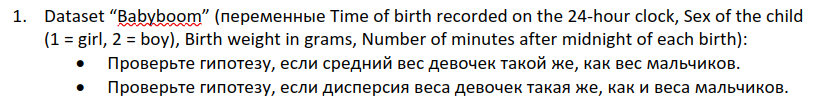

In [13]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

cols = ['Time of birth', 'Sex', 'weight', 'Minutes after midnight']
df = pd.read_fwf('datasets/babyboom.dat.txt', header=None, widths=[8, 11, 8, 8], names=cols)

df.head()

,Time of birth,Sex,weight,Minutes after midnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [14]:
dfd = df.loc[(df['Sex'] == 1)]
dfm = df.loc[(df['Sex'] == 2)]

#### Проверка гипотезы о том, что средний вес девочек = среднему весу мальчиков
Для проверки веса на нормальность используем критерий Колмогорова

In [15]:
print("М", sm.stats.diagnostic.lilliefors(dfm['weight'], dist='norm', pvalmethod='table'))
print("Ж", sm.stats.diagnostic.lilliefors(dfd['weight'], dist='norm', pvalmethod='table'))

М (0.15544307065675722, 0.1059581856011847)
Ж (0.21427812399671214, 0.02846526863248284)


##### Критерий Стьюдента (T-test)
Поскольку вес распределение веса девочек и мальчиков подчиняется нормальному распределению, используем критерий Стьюдента

In [16]:
st.ttest_ind(dfd['weight'], dfm['weight'])

TtestResult(statistic=-1.5228564442562815, pvalue=0.1352891891054555, df=42.0)

#### Проверка гипотезы о том, что дисперсия веса Д и М одинаковая


In [17]:
#НЕНОРМ РАСПР НЕЛЬЗЯ ИСПОЛЬЗОВАТЬ КРИТЕРИЙ СТЬЮДЕНТА И ФИШЕРА

st.levene(dfd['weight'], dfm['weight'])

LeveneResult(statistic=1.8154103472308154, pvalue=0.18508483634639294)